In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

#from gensim.models import Word2Vec
#from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


stopwords = set(stopwords.words('english'))
symbols   = ['.', ',', '’','“','”','"', "''" ,"'",'*','``', '**','$','%','&','#','-','--',"''",'""','?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"'s","'m","n't"]
stopwords.update(symbols)



def remove_urls (source_text):
    url_reg  = r'[a-z]*[:.]+\S+'
    result   = re.sub(url_reg, '', source_text)
    return result

In [2]:
time_filter = 'year'
keywords  = 'hot'#"fund"
search_date = datetime.datetime(2020,1,1)
subreddit = 'investing'
data = pd.read_csv('./Reddit Data/'+ subreddit + '_' +datetime.datetime.strftime(search_date,"%Y-%m-%d") + '.csv')
#data = pd.read_csv('./Reddit Data/keywords_'+ datetime.datetime.strftime(search_date,"%Y-%m-%d") + '.csv')
data.head()

,Date,Name,Score,Title,Content
0,2020-01-03,ChocolateTsar,1510,Tesla tops Wall Street estimates with a record...,"&gt;Tesla delivered a record 112,000 vehicles ..."
1,2020-01-04,Fobulousguy,381,"Is there any good ELI5 resources on PUTS, SHOR...",NaN
2,2020-01-02,FortyYearOldVirgin,380,"Dow jumps 250 points, hits record as Wall Stre...",[https://www.cnbc.com/2020/01/02/dow-futures-p...
3,2020-01-04,CIARRAPUNGI,340,What was your path in learning about the stock...,NaN
4,2020-01-05,howtoreadspaghetti,312,I got bored and went through Amazon's financia...,[https://docs.google.com/spreadsheets/d/1naBI-...


In [3]:
# Remove NaN
data = data.dropna()
data.reset_index()

# Remove the http and https
for i in range(len(data)):
    data['Content'].iloc[i] = remove_urls(data['Content'].iloc[i])

C:\Users\Gunther\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
print("Total available data :",len(data))
filtered_title = []
filtered_content = []
lemmatizer = WordNetLemmatizer()
for title, content in zip(data['Title'], data['Content']):
    filtered_title.append([lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(title.lower()) if word not in stopwords])
    filtered_content.append([lemmatizer.lemmatize(word, pos="n")  for word in word_tokenize(content.lower()) if word not in stopwords])


Total available data : 5111


# Word frequency for Title

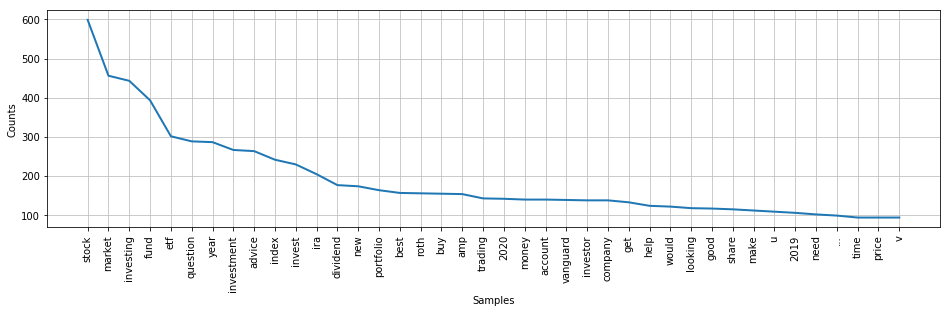

In [9]:
all_filtered_title = sum(filtered_title, [])
fdist_title = nltk.FreqDist(all_filtered_title)
plt.figure(figsize=(16,4))
fdist_title.plot(40,cumulative=False)

In [10]:
df_title = pd.DataFrame.from_dict(fdist_title, orient='index')
df_title.columns = ['Counts']
df_title = df_title.sort_values(by=['Counts'], ascending=False)
df_title.head()

,Counts
stock,599
market,456
investing,443
fund,393
etf,301


# Word frequency for Content

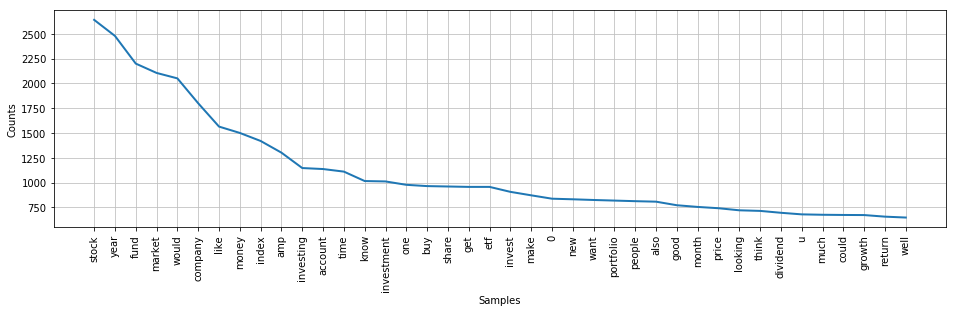

In [11]:
all_filtered_content = sum(filtered_content, [])
fdist_content = nltk.FreqDist(all_filtered_content)
plt.figure(figsize=(16,4))
fdist_content.plot(40,cumulative=False)

In [12]:
df_content = pd.DataFrame.from_dict(fdist_content, orient='index')
df_content.columns = ['Counts']
df_content = df_content.sort_values(by=['Counts'], ascending=False)
df_content.head()

,Counts
stock,2641
year,2479
fund,2200
market,2106
would,2051


# TF-IDF for Title

In [15]:
filtered_title_sentence = []
for i in range(len(filtered_title)):
    filtered_title_sentence.append(' '.join(filtered_title[i]))
    
vectorizer  = CountVectorizer()
transformer = TfidfTransformer()
tfidf  = transformer.fit_transform(vectorizer.fit_transform(filtered_title_sentence))
word   = vectorizer.get_feature_names()
weight = tfidf.toarray()
tfidf_table = {'Word':word,'Weight':sum(weight)}

In [18]:
df_tfidf = pd.DataFrame(tfidf_table)
df_tfidf = df_tfidf.set_index('Word')
df_tfidf = df_tfidf.sort_values(by=['Weight'], ascending=False)

In [23]:
df_tfidf[:5]

,Weight
Word,
stock,140.440114
investing,137.388373
market,108.181628
fund,107.356864
question,105.534240


# TF-IDF for Content

In [24]:
filtered_content_sentence = []
for i in range(len(filtered_content)):
    filtered_content_sentence.append(' '.join(filtered_content[i]))
    
vectorizer  = CountVectorizer()
transformer = TfidfTransformer()
tfidf  = transformer.fit_transform(vectorizer.fit_transform(filtered_content_sentence))
word   = vectorizer.get_feature_names()
weight = tfidf.toarray()
tfidf_table = {'Word':word,'Weight':sum(weight)}

In [25]:
df_tfidf = pd.DataFrame(tfidf_table)
df_tfidf = df_tfidf.set_index('Word')
df_tfidf = df_tfidf.sort_values(by=['Weight'], ascending=False)

In [28]:
df_tfidf[:20]

,Weight
Word,
removed,463.623587
stock,146.131901
year,126.375823
fund,113.627226
would,112.392714
market,106.303912
investing,103.020248
deleted,100.938219
money,95.101207
